# Deep Learning Models as Fixed Features Extractors

A simple neural network uses the pre-trained VGG16, Xception, ResNet50 and Inception V3 deep learning networks as fixed features extractors. The last convolutional output of the pre-trained models, the bottleneck features calculated in a different [notebook](bottleneckFeaturesExtraction.ipynb), is fed as input to our model. The number of training, validation and test tensors is 20,000, 2,000, 2,000, respectively.

The idea is to compare the capacity of the VGG16, Xception, ResNet50 and Inception V3 to produce relevant features for our classification task. For this reason, we use below the same very simple neural network to classify the photographs. It is made of a global average pooling layer and a fully connected layer, where the latter contains one node for each label, i.e. 9, and is equipped with a `sigmoid` activation function to derive probabilities. The $F_1$ score is then calculated.

---

1. [VGG16](#vgg)
2. [Xception](#xception)
3. [ResNet50](#resnet)
4. [InceptionV3](#inception)

---

## 1. VGG16
<a id="vgg"></a>

### A. Load Bottleneck Features

The training, validation and test tensors along with the associated targets are loaded. 

In [2]:
import numpy as np
from common import *

bottleneck_features = np.load('data/bottleneck_features/yelp_vgg16.npz')
train_vgg16 = bottleneck_features['train_features']
valid_vgg16 = bottleneck_features['valid_features']
test_vgg16 = bottleneck_features['test_features']

train_targets = bottleneck_features['train_targets']
valid_targets = bottleneck_features['valid_targets']
test_targets = bottleneck_features['test_targets']

### B. Architecture

In [3]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

vgg16 = Sequential()
vgg16.add(GlobalAveragePooling2D(input_shape=train_vgg16.shape[1:]) )
vgg16.add(Dense(9, activation='sigmoid') )

vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 4617      
Total params: 4,617
Trainable params: 4,617
Non-trainable params: 0
_________________________________________________________________


### C. Compilation and Minimization

In [4]:
from keras.optimizers import SGD

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
vgg16.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='data/saved_models/weights_compare_vgg16.hdf5', save_best_only=True)
checkimprovement = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

history_vgg16 = vgg16.fit(train_vgg16, train_targets, 
                          validation_data=(valid_vgg16,valid_targets), 
                          epochs=1000, batch_size=64, verbose=0,
                          callbacks=[checkpointer,checkimprovement])

The values of the loss function and the accuracy metric across epochs are plotted below for the training (blue) and validation (red) data.

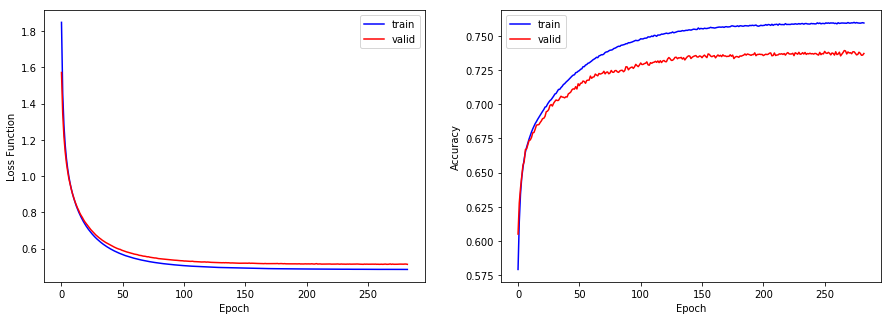

In [6]:
history(history_vgg16)

The best model, i.e, the one with the lowest value of the loss function calculated on the validation data, is loaded.

In [7]:
vgg16.load_weights('data/saved_models/weights_compare_vgg16.hdf5')

### D. $F_1$ score

Predictions are made on the test data and the $F_1$ score is then calculated.

In [8]:
vgg16_predictions = (vgg16.predict(test_vgg16) >= 0.5).astype(int)

In [9]:
vgg16_score = f1_score(test_targets, vgg16_predictions)
print('F1 score: %.5f' % vgg16_score)

F1 score: 0.75284


## 2. Xception
<a id="xception"></a>

### A. Load Bottleneck Features

The training, validation and test tensors along with the associated targets are loaded. 

In [10]:
import numpy as np
from common import *

bottleneck_features = np.load('data/bottleneck_features/yelp_xception.npz')
train_xception = bottleneck_features['train_features']
valid_xception = bottleneck_features['valid_features']
test_xception = bottleneck_features['test_features']

train_targets = bottleneck_features['train_targets']
valid_targets = bottleneck_features['valid_targets']
test_targets = bottleneck_features['test_targets']

### B. Architecture

In [11]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

xception = Sequential()
xception.add(GlobalAveragePooling2D(input_shape=train_xception.shape[1:]) )
xception.add(Dense(9, activation='sigmoid') )

xception.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 18441     
Total params: 18,441
Trainable params: 18,441
Non-trainable params: 0
_________________________________________________________________


### C. Compilation and Minimization

In [12]:
from keras.optimizers import SGD

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
xception.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='data/saved_models/weights_compare_xception.hdf5', save_best_only=True)
checkimprovement = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

history_xception = xception.fit(train_xception, train_targets, 
                                validation_data=(valid_xception,valid_targets), 
                                epochs=1000, batch_size=64, verbose=0,
                                callbacks=[checkpointer,checkimprovement])

The values of the loss function and the accuracy metric across epochs are plotted below for the training (blue) and validation (red) data.

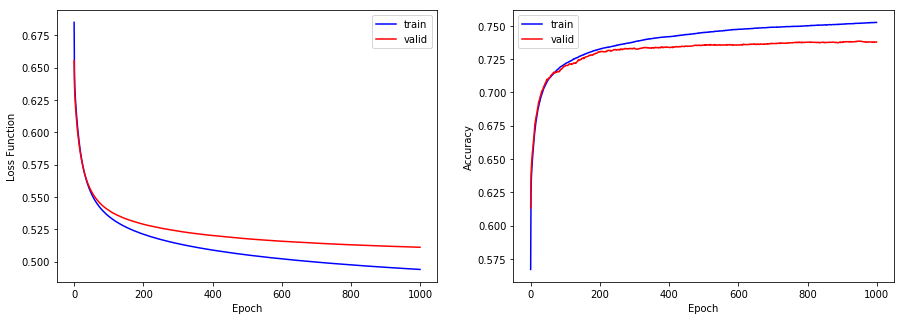

In [14]:
history(history_xception)

The best model, i.e, the one with the lowest value of the loss function calculated on the validation data, is loaded.

In [15]:
xception.load_weights('data/saved_models/weights_compare_xception.hdf5')

### D. $F_1$ score

Predictions are made on the test data and the $F_1$ score is then calculated.

In [16]:
xception_predictions = (xception.predict(test_xception) >= 0.5).astype(int)

In [17]:
xception_score = f1_score(test_targets, xception_predictions)
print('F1 score: %.5f' % xception_score)

F1 score: 0.74756


## 3. ResNet50
<a id="resnet"></a>

### A. Load Bottleneck Features

The training, validation and test tensors along with the associated targets are loaded. 

In [18]:
import numpy as np
from common import *

bottleneck_features = np.load('data/bottleneck_features/yelp_resnet50.npz')
train_resnet50 = bottleneck_features['train_features']
valid_resnet50 = bottleneck_features['valid_features']
test_resnet50 = bottleneck_features['test_features']

train_targets = bottleneck_features['train_targets']
valid_targets = bottleneck_features['valid_targets']
test_targets = bottleneck_features['test_targets']

### B. Architecture

In [19]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

resnet50 = Sequential()
resnet50.add(GlobalAveragePooling2D(input_shape=train_resnet50.shape[1:]))
resnet50.add(Dense(9, activation='sigmoid'))

resnet50.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 18441     
Total params: 18,441
Trainable params: 18,441
Non-trainable params: 0
_________________________________________________________________


### C. Compilation and Minimization

In [20]:
from keras.optimizers import SGD

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
resnet50.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='data/saved_models/weights_compare_resnet50.hdf5', save_best_only=True)
checkimprovement = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

history_resnet50 = resnet50.fit(train_resnet50, train_targets, 
                                validation_data=(valid_resnet50,valid_targets), 
                                epochs=1000, batch_size=64, verbose=0,
                                callbacks=[checkpointer,checkimprovement])

The values of the loss function and the accuracy metric across epochs are plotted below for the training (blue) and validation (red) data.

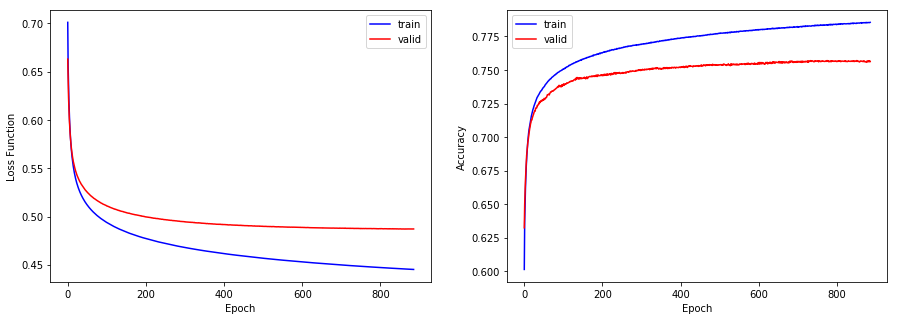

In [22]:
history(history_resnet50)

The best model, i.e, the one with the lowest value of the loss function calculated on the validation data, is loaded.

In [23]:
resnet50.load_weights('data/saved_models/weights_compare_resnet50.hdf5')

### D. $F_1$ score

Predictions are made on the test data and the $F_1$ score is then calculated.

In [24]:
resnet50_predictions = (resnet50.predict(test_resnet50) >= 0.5).astype(int)

In [25]:
resnet50_score = f1_score(test_targets, resnet50_predictions)
print('F1 score: %.5f' % resnet50_score)

F1 score: 0.76744


## 4. InceptionV3
<a id="inception"></a>

### A. Load Bottleneck Features

The training, validation and test tensors along with the associated targets are loaded. 

In [26]:
import numpy as np
from common import *

bottleneck_features = np.load('data/bottleneck_features/yelp_inception.npz')
train_inception = bottleneck_features['train_features']
valid_inception = bottleneck_features['valid_features']
test_inception = bottleneck_features['test_features']

train_targets = bottleneck_features['train_targets']
valid_targets = bottleneck_features['valid_targets']
test_targets = bottleneck_features['test_targets']

### B. Architecture

In [27]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

inception = Sequential()
inception.add(GlobalAveragePooling2D(input_shape=train_inception.shape[1:]))
inception.add(Dense(9, activation='sigmoid'))

inception.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 18441     
Total params: 18,441
Trainable params: 18,441
Non-trainable params: 0
_________________________________________________________________


### C. Compilation and Minimization

In [28]:
from keras.optimizers import SGD

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
inception.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [29]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='data/saved_models/weights_compare_inception.hdf5', save_best_only=True)
checkimprovement = EarlyStopping(monitor='val_loss', min_delta=0, patience=20)

history_inception = inception.fit(train_inception, train_targets, 
                                  validation_data=(valid_inception,valid_targets), 
                                  epochs=1000, batch_size=64, verbose=0,
                                  callbacks=[checkpointer,checkimprovement])

The values of the loss function and the accuracy metric across epochs are plotted below for the training (blue) and validation (red) data.

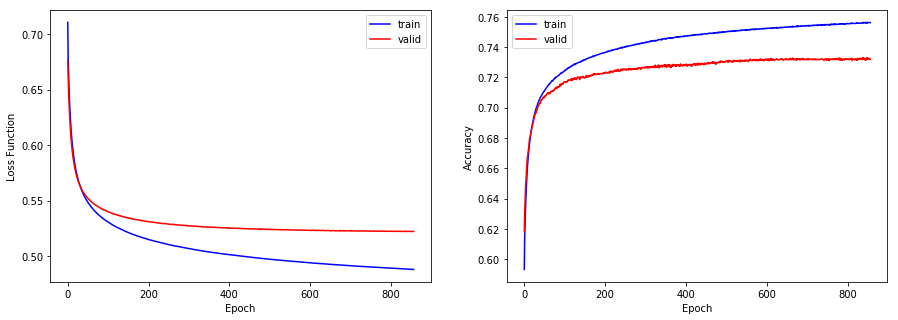

In [30]:
history(history_inception)

The best model, i.e, the one with the lowest value of the loss function calculated on the validation data, is loaded.

In [31]:
inception.load_weights('data/saved_models/weights_compare_inception.hdf5')

### D. $F_1$ score

Predictions are made on the test data and the $F_1$ score is then calculated.

In [32]:
inception_predictions = (inception.predict(test_inception) >= 0.5).astype(int)

In [33]:
inception_score = f1_score(test_targets, inception_predictions)
print('F1 score: %.5f' % inception_score)

F1 score: 0.74086
